### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Plant_Parameters.csv')

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

###Checking missing values in dataset

In [ ]:
print(pd.isnull(dataset).sum())

pH             0
Soil EC        0
Phosphorus     1
Potassium      1
Urea           1
T.S.P          1
M.O.P          1
Moisture       1
Temperature    1
Plant Type     1
dtype: int64


###Handling missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(x[:, :])
x[:, :] = imputer.transform(x[:, :])

In [ ]:
print(pd.isnull(x).sum())

0


In [ ]:
print(pd.isnull(y).sum())

1


In [ ]:
mask = ~pd.isna(y)
y = y[mask]
x = x[mask]

In [ ]:
print(pd.isnull(y).sum())

0


###Splitting data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

###Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

###Model prediction

In [ ]:
y_pred = classifier.predict(x_test)

###Comparing the original data to predicted data

In [ ]:
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)), 1))

[['Eggplant' 'Eggplant']
 ['Eggplant' 'Eggplant']
 ['Chili' 'Chili']
 ...
 ['Cinnamon' 'Cinnamon']
 ['Cinnamon' 'Cinnamon']
 ['Cinnamon' 'Cinnamon']]


### data Visualization of actual and predicted data

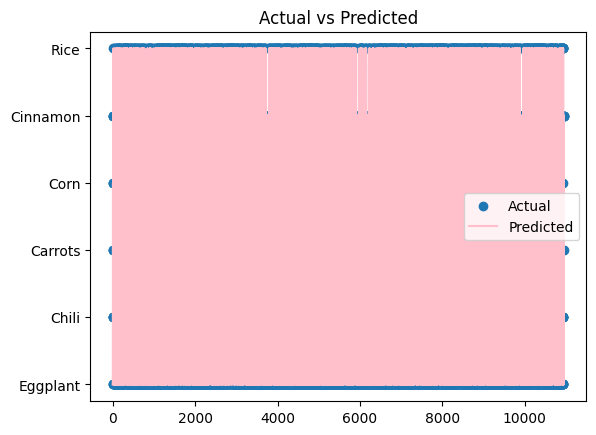

In [ ]:
plt.title('Actual vs Predicted')
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='pink', label='Predicted')
plt.legend()
plt.show()

###Confusion matrix

<Axes: >

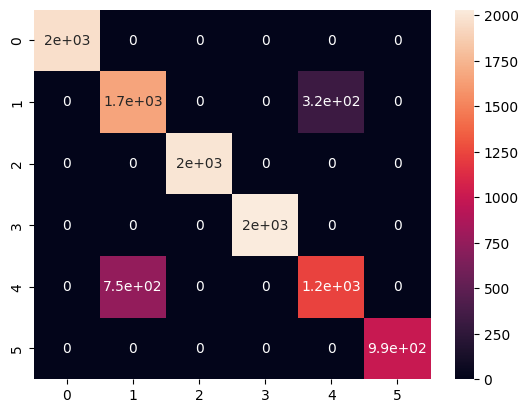

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

###Accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"The accuracy of the model is: {accuracy}%")

The accuracy of the model is: 90.26%


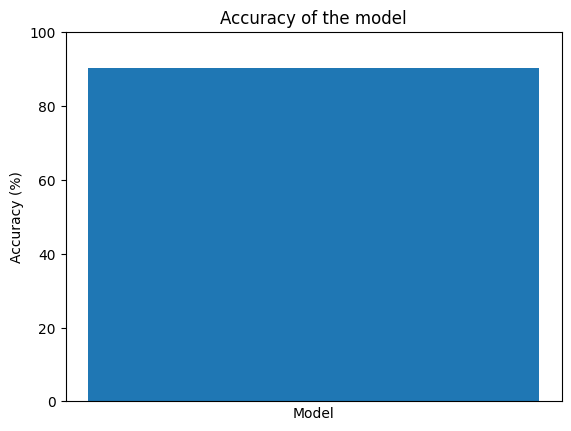

In [ ]:
plt.title('Accuracy of the model')
plt.bar(x=[0], height=accuracy)  # Provide a dummy x-value and the accuracy as height
plt.xticks([]) # Hide x-axis ticks
plt.xlabel('Model') # Label the x-axis
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100) # Set the y-axis limits to 0-100
plt.show()

###Save the model

In [ ]:
joblib.dump(classifier, 'crop_prediction.joblib')
joblib.dump(sc, 'scaler.joblib')

['scaler.joblib']